# Importing Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as hcluster

# Data Preprocessing & Visualization

In [2]:
dic_df = pd.read_csv('data-dictionary.csv')
df = pd.read_csv('Country-data.csv')

In [3]:
dic_df

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe().round(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.80,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df['country'].nunique()

167

As we are going to use Unsupervised learning technique we don't need the country column here.So we are going to drop it

In [9]:
# Data Preprocessing & Visualization

In [10]:
data = df.drop(['country'], axis=1)

In [11]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


<Axes: >

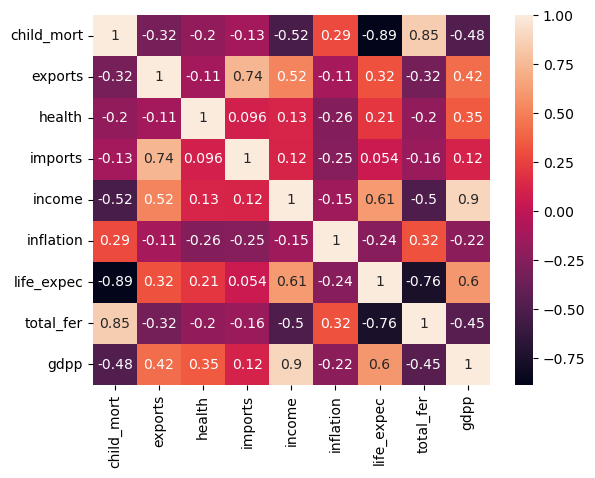

In [12]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)

From above we can conclude that:<br>

1. gdpp and income,imports and exports,child_mort and total_fert are highly positive correlated<br>
2. whereas life_expec and child_mort are highly negative correlated

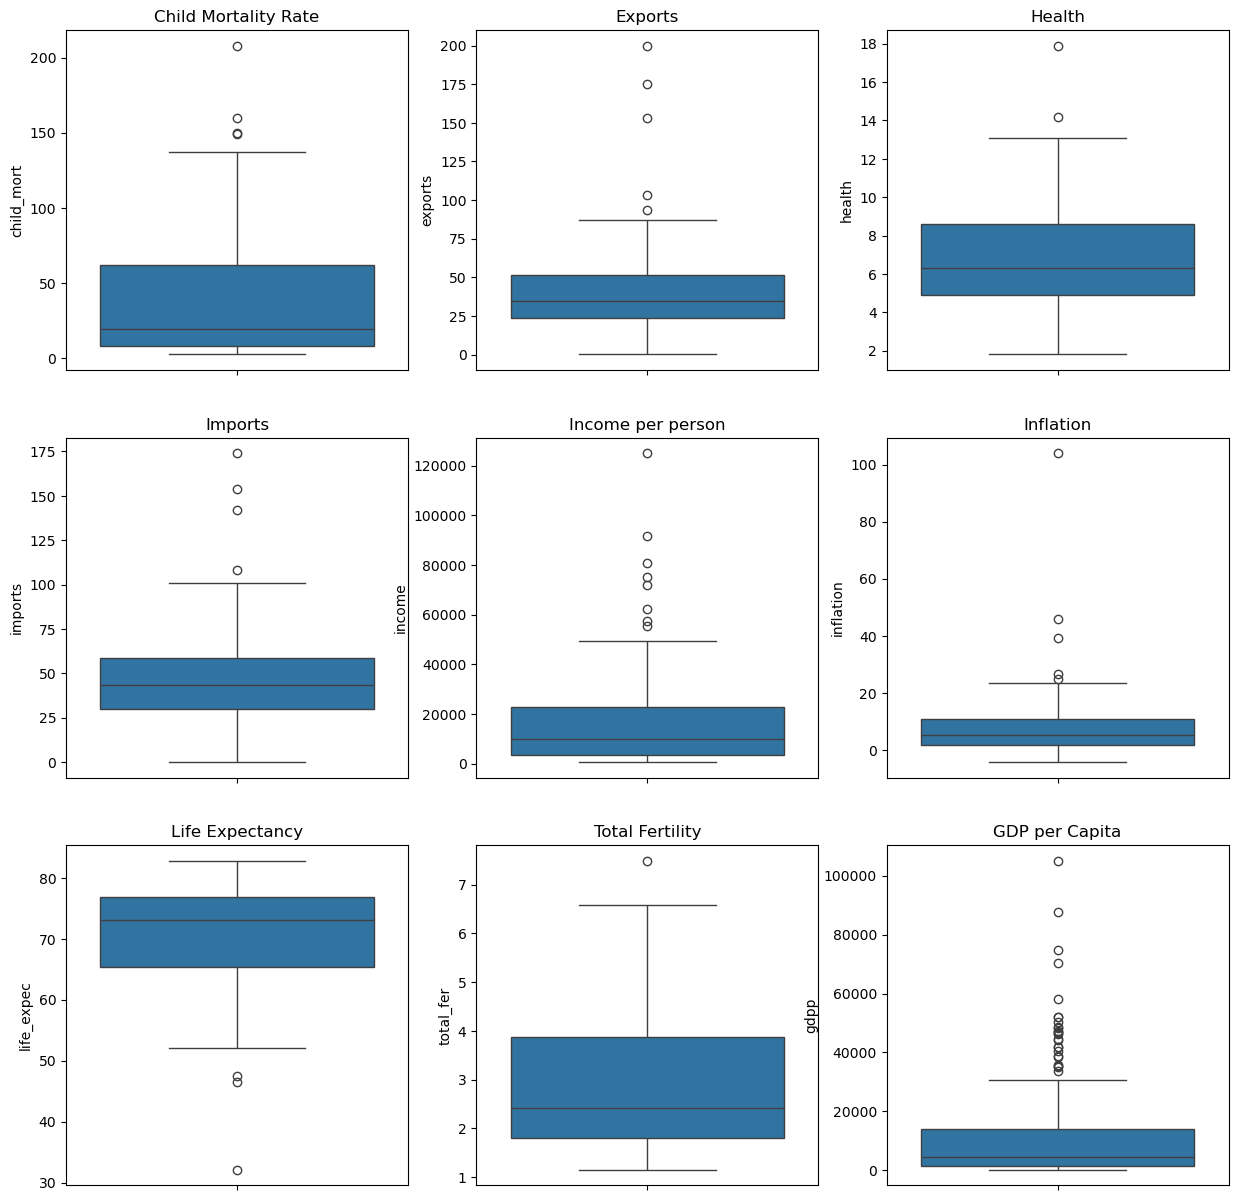

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))
bp = sns.boxplot(y=data.child_mort, ax=ax[0,0])
ax[0,0].set_title('Child Mortality Rate')
bp = sns.boxplot(y=data.exports, ax=ax[0,1])
ax[0,1].set_title('Exports')
bp = sns.boxplot(y=data.health, ax=ax[0,2])
ax[0,2].set_title('Health')
bp = sns.boxplot(y=data.imports, ax=ax[1,0])
ax[1,0].set_title('Imports')
bp = sns.boxplot(y=data.income, ax=ax[1,1])
ax[1,1].set_title('Income per person')
s = sns.boxplot(y=data.inflation, ax=ax[1,2])
ax[1,2].set_title('Inflation')
s = sns.boxplot(y=data.life_expec, ax=ax[2,0])
ax[2,0].set_title('Life Expectancy')
s = sns.boxplot(y=data.total_fer, ax=ax[2,1])
ax[2,1].set_title('Total Fertility')
s = sns.boxplot(y=data.gdpp, ax=ax[2,2])
ax[2,2].set_title('GDP per Capita')
plt.show()

From above box-plots we can see that their are so many outliers in our dataset.Most of the outliers are in income per person,GDP per captia and Exports.Now we can remove the outliers but we are not going to do it as our dataset is very small (167 rows only)

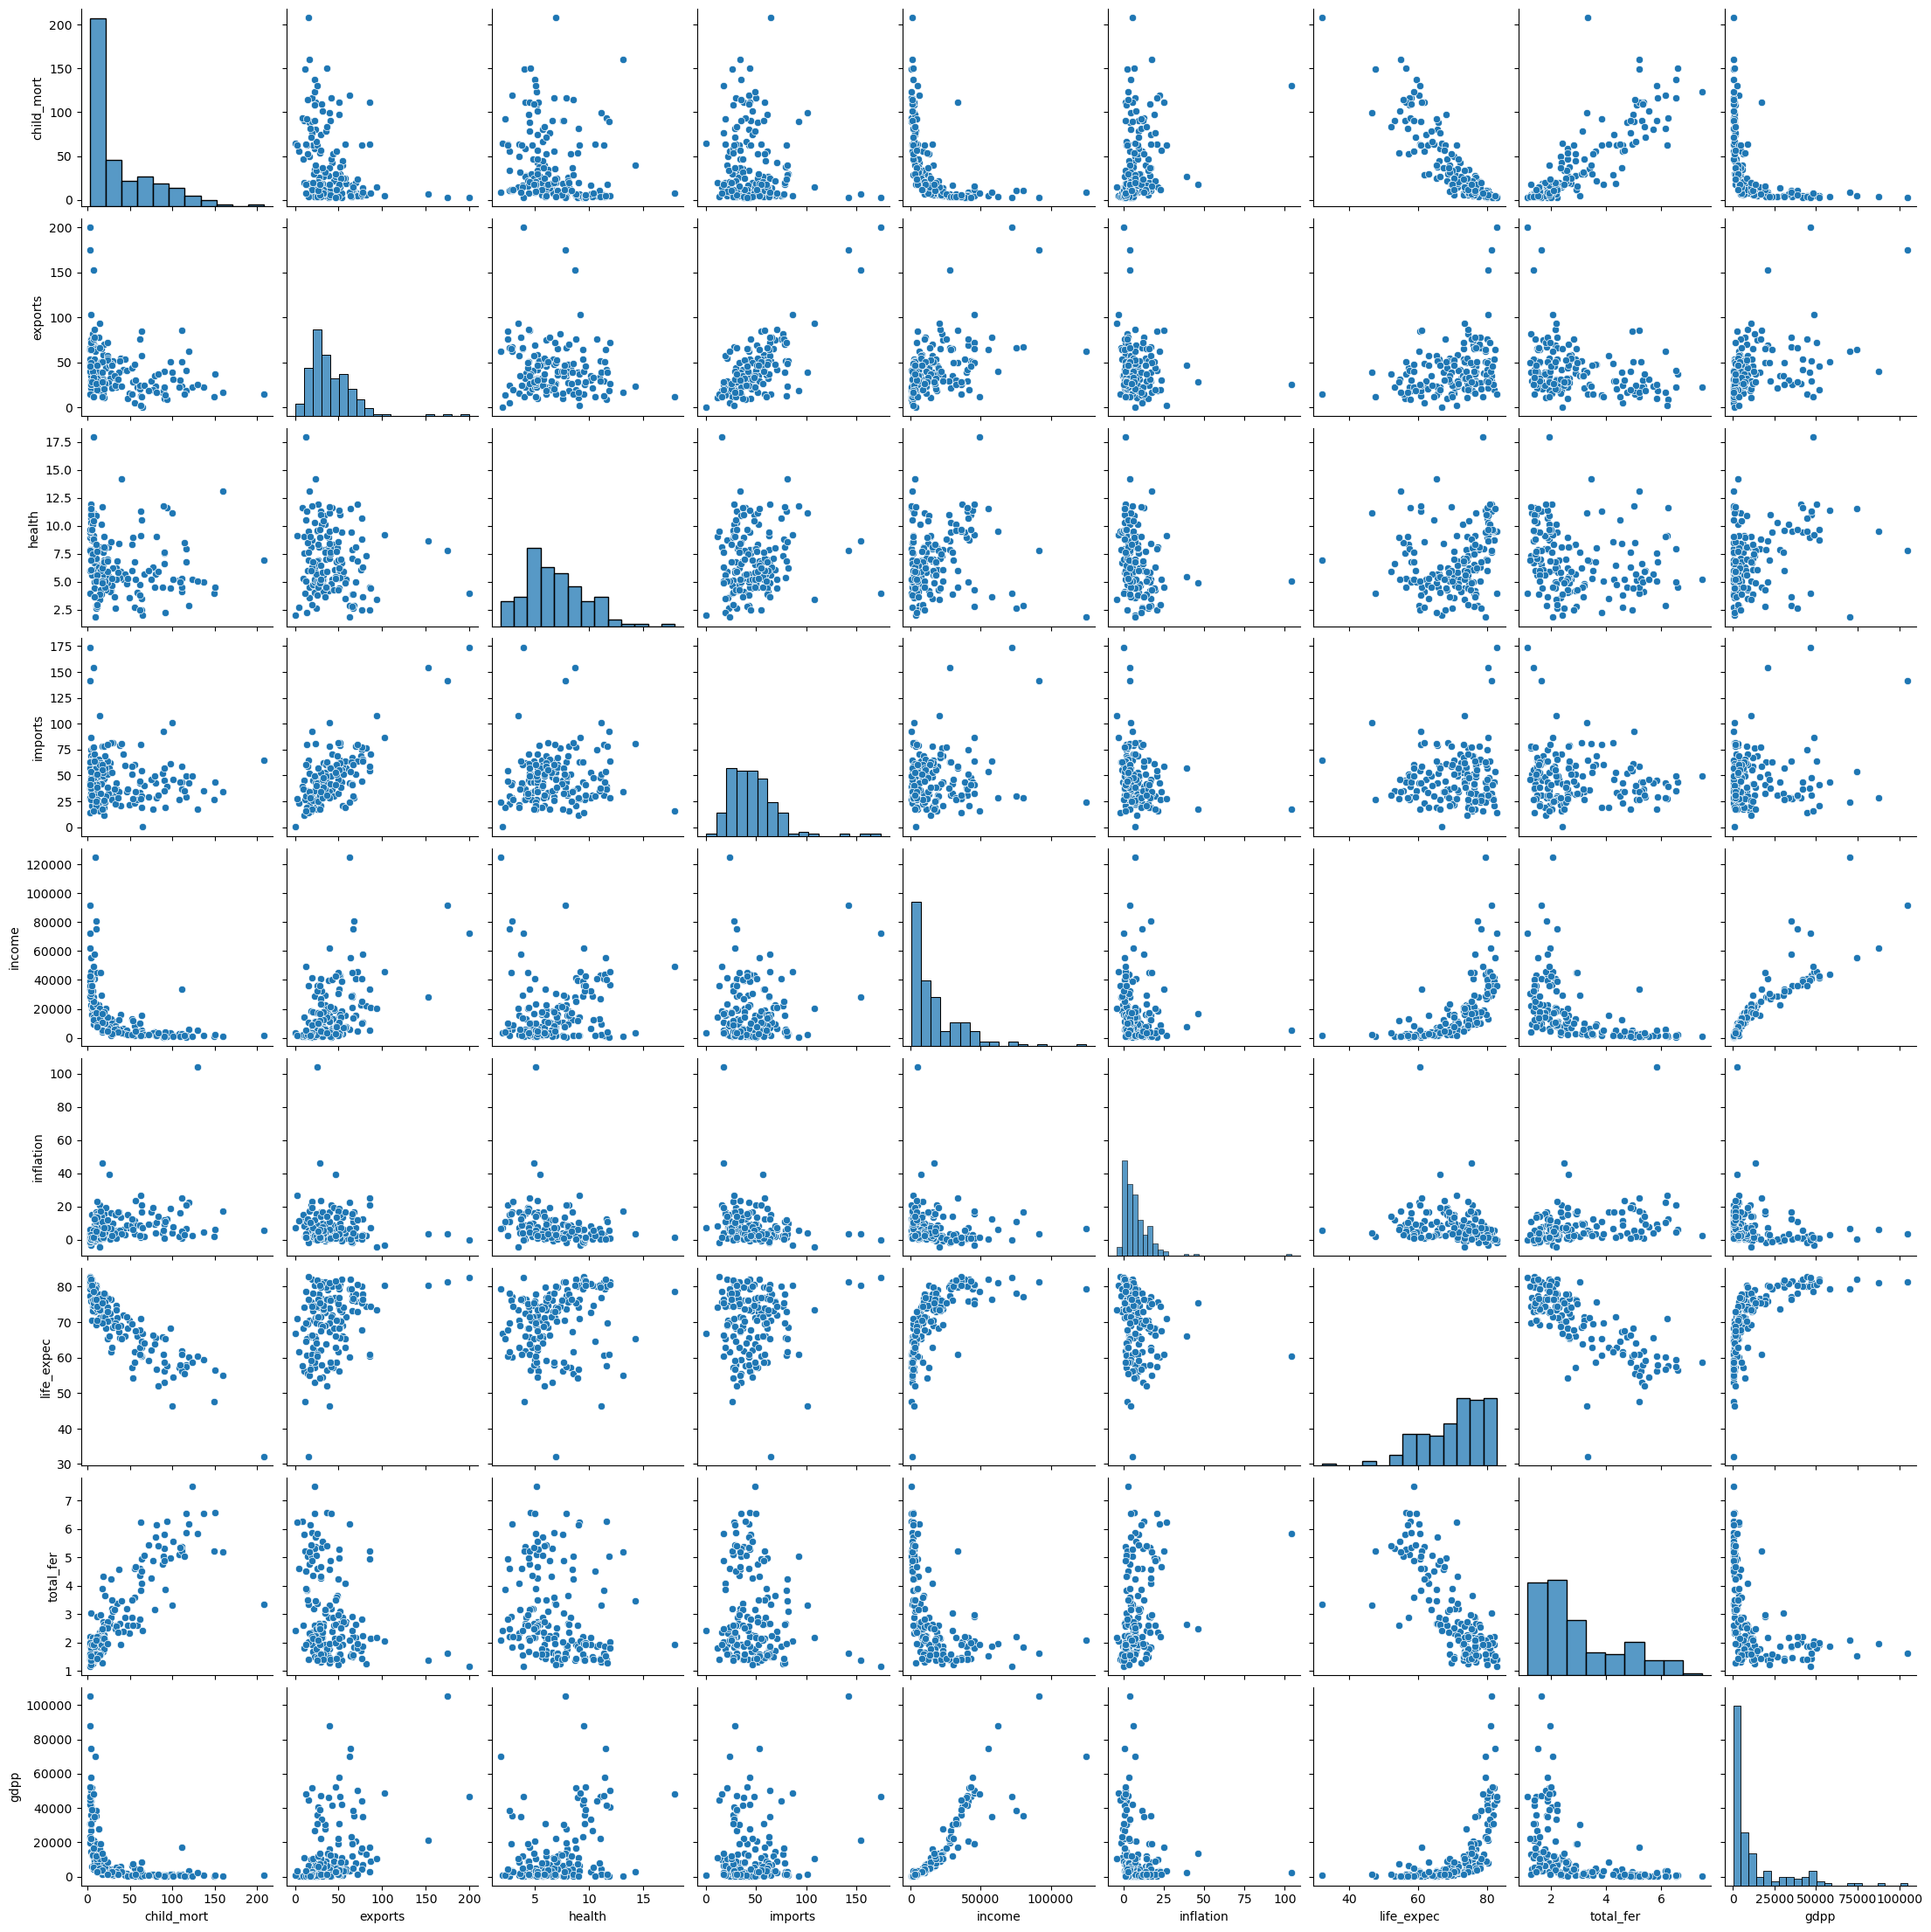

In [14]:
sns.pairplot(data)

In [15]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Scaling data

In [16]:
scaling = StandardScaler()
scaled = scaling.fit_transform(data)
scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [17]:
scaled_df = pd.DataFrame(scaled, columns=data.columns)
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


# K-Means Clustering

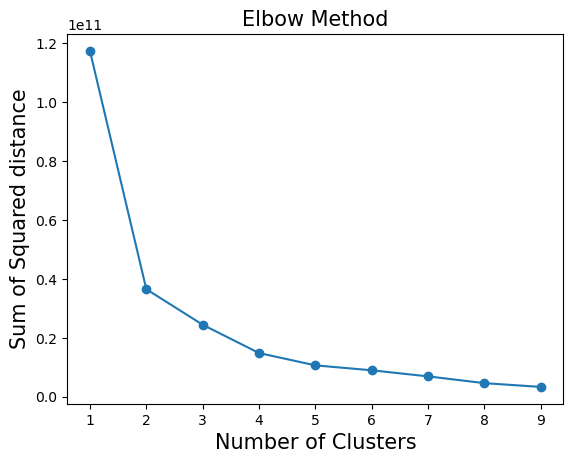

In [18]:
a = []
k = range(1,10)
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    a.append(kmeans.inertia_)

plt.plot(k, a, marker='o')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Sum of Squared distance', fontsize=15)
plt.show()

In [19]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=111)

In [20]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    84
1    47
2    36
Name: count, dtype: int64

In [21]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3

metrics.silhouette_score(scaled_df, kmeans.labels_)

0.28329575683463126

# Prediction

In [22]:
kmeans.fit_predict(scaled_df)

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [23]:
preds = kmeans.labels_
kmeans_df = df.copy()

In [24]:
kmeans_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [25]:
kmeans_df['kmeans_clusters'] = preds
kmeans_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [26]:
# save KMeans file
kmeans_df.to_csv('kmeans_result_Elshafei.csv',index=False)

# Visualization of clusters

In [27]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    84
1    47
2    36
Name: count, dtype: int64

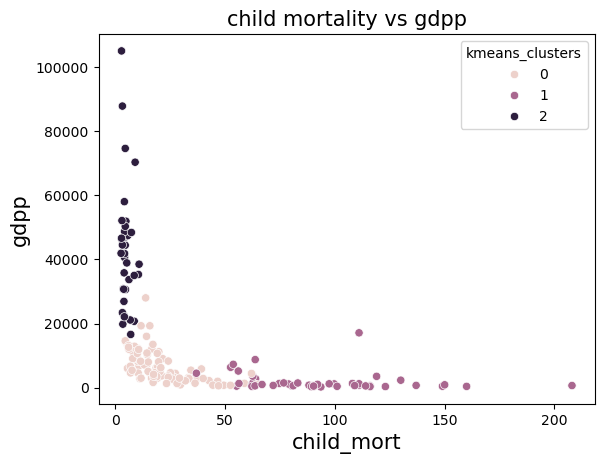

In [28]:
#visulization of clusters child mortality vs gdpp
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()
sns.scatterplot(data=kmeans_df, x=kmeans_df['child_mort'], y=kmeans_df['gdpp'], hue='kmeans_clusters')
plt.title('child mortality vs gdpp', fontsize=15)
plt.xlabel('child_mort', fontsize=15)
plt.ylabel('gdpp', fontsize=15)
plt.show()

In [29]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    84
1    47
2    36
Name: count, dtype: int64

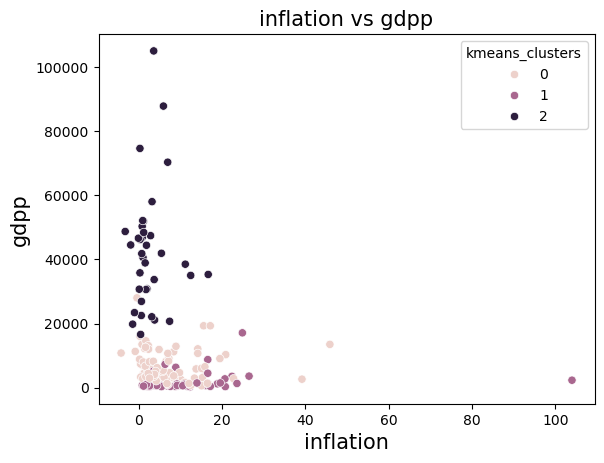

In [30]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(data=kmeans_df, x=kmeans_df['inflation'], y=kmeans_df['gdpp'], hue='kmeans_clusters')
plt.title('inflation vs gdpp', fontsize=15)
plt.xlabel('inflation', fontsize=15)
plt.ylabel('gdpp', fontsize=15)
plt.show()


**So here we conclude that**<br>
0 = **developing country**<br>
1 = **under-developed country**<br>
2 = **developed country**<br>

In [31]:
#find number of developed country,developing country,under-developed country
developed = kmeans_df[kmeans_df['kmeans_clusters']==2]['country']
developing = kmeans_df[kmeans_df['kmeans_clusters']==0]['country']
under_developed = kmeans_df[kmeans_df['kmeans_clusters']==1]['country']

print("Numper of developed country : ", len(developed))
print("Numper of developing country : ", len(developing))
print("Numper of under_developed country : ", len(under_developed))

Numper of developed country :  36
Numper of developing country :  84
Numper of under_developed country :  47


In [32]:
#list of developed countries
list(developed)

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [33]:
#list of developing countries
list(developing)

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

In [34]:
#list of under-developing countries
list(under_developed)

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

**Let's check that is United Arab Emirates is present in developed countries list**

In [35]:
for i in developed:
    if i == 'United Arab Emirates':
        print('Yes', i, 'is present in developed countries list')

Yes United Arab Emirates is present in developed countries list


In [37]:
# This code checks the category of a country (developed, developing, or under_developed) based on its name.
developed_lower = [c.lower() for c in developed]
developing_lower = [c.lower() for c in developing]
under_developed_lower = [c.lower() for c in under_developed]

country_name = input('Enter the name of the country :').strip().lower()

if country_name in developed_lower:
    print(country_name.title(), 'is a Developed Country.')
elif country_name in developing_lower:
    print(country_name.title(), 'is a Developing Country')
elif country_name in under_developed_lower:
    print(country_name.title(), 'is an Underdeveloped Country.')
else:
    print(country_name.title(), 'is not found in any category')

Enter the name of the country : egypt


Egypt is a Developing Country


# Hierarchical Clustering

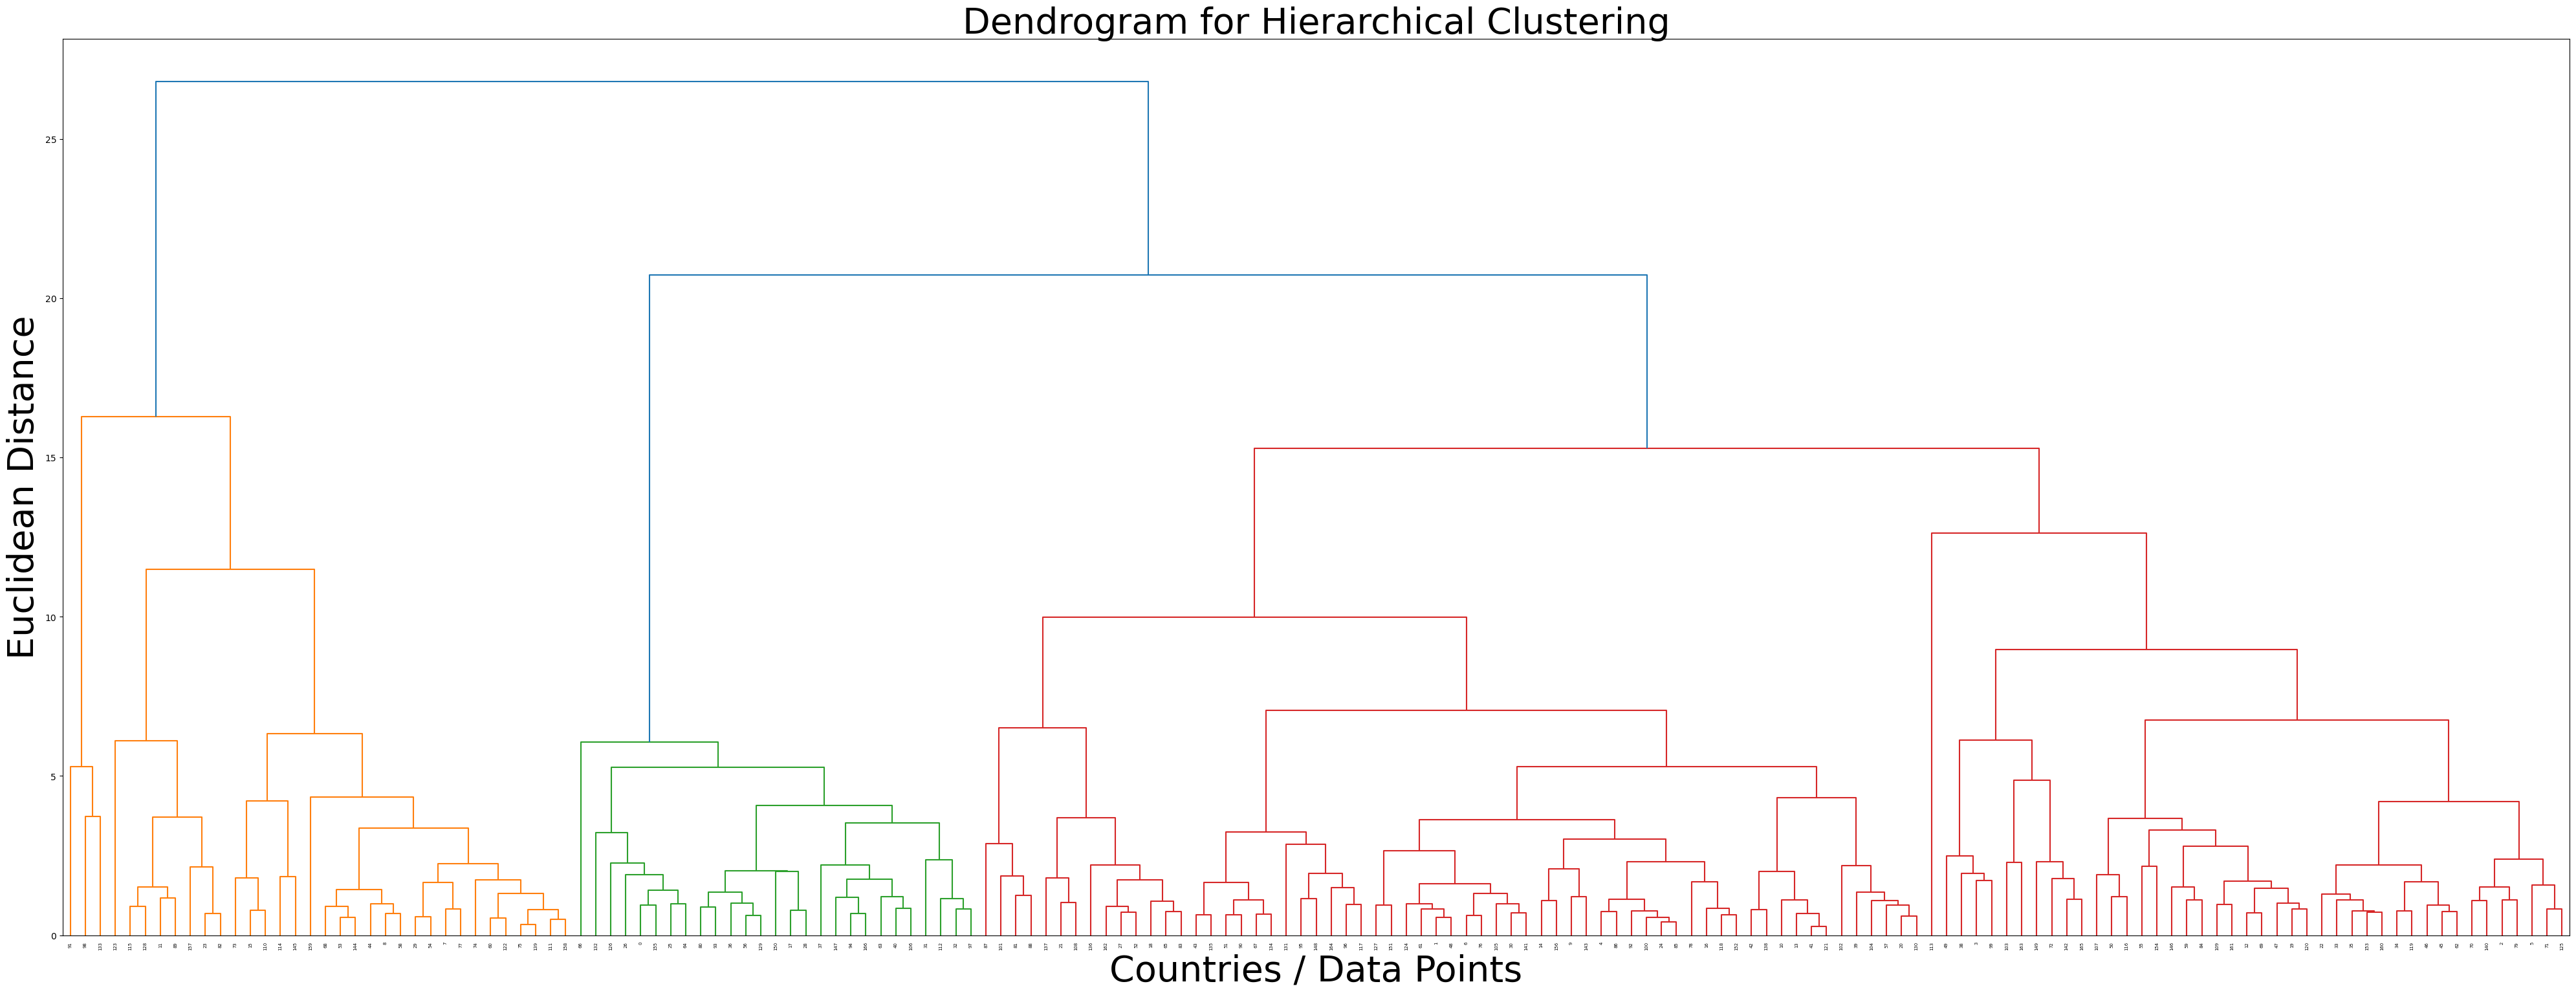

In [40]:
#plotting dendogram
plt.figure(figsize=(50,18))
dend = hcluster.dendrogram(hcluster.linkage(scaled_df, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering",fontsize=40)
plt.xlabel("Countries / Data Points", fontsize=40)
plt.ylabel("Euclidean Distance", fontsize=40)
plt.show()

In [43]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_

In [46]:
hcluster_df = df.copy()
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
hcluster_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


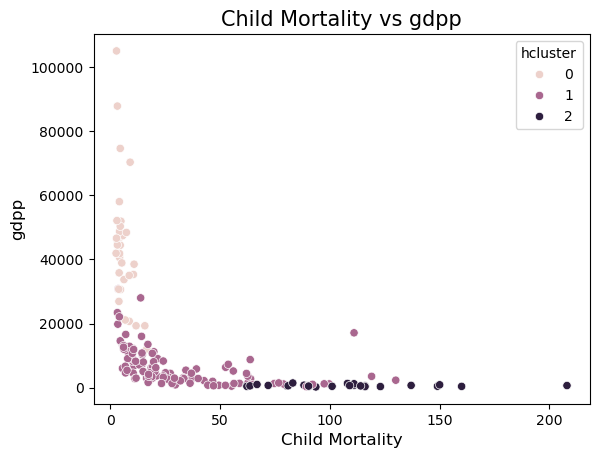

In [48]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(data=hcluster_df, x=hcluster_df['child_mort'], y=hcluster_df['gdpp'],hue='hcluster')
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

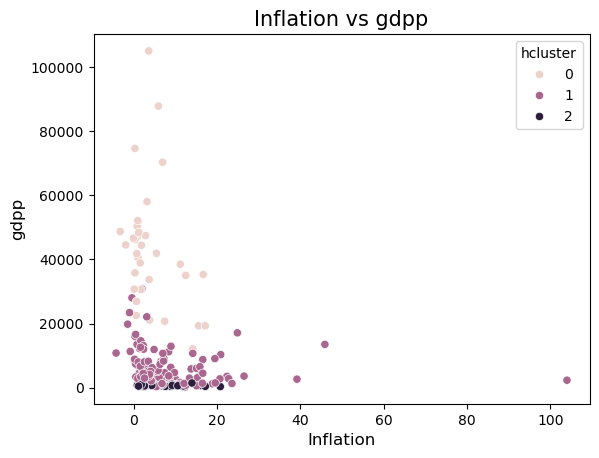

In [49]:
#visulazing hcluster results
sns.scatterplot(data=hcluster_df, x=hcluster_df['inflation'], y=hcluster_df['gdpp'],hue='hcluster')
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

From above we can conclude that:-<br>
0 = developed country<br>
1 = developing country<br>
2 = under-developing country

In [50]:
#find number of developed country,developing country,under-developed country
developed=hcluster_df[hcluster_df['hcluster']==0]['country']
developing=hcluster_df[hcluster_df['hcluster']==1]['country']
under_developing=hcluster_df[hcluster_df['hcluster']==2]['country']

print("Number of deveoped countries",len(developed))
print("Number of developing countries",len(developing))
print("Number of under-developing countries",len(under_developing))

Number of deveoped countries 34
Number of developing countries 106
Number of under-developing countries 27


In [51]:
# save hcluster file
hcluster_df.to_csv('hcluster_result_Elshafei.csv',index=False)